In [3]:
from scipy.optimize import differential_evolution
import numpy as np

def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-5, 5), (-5, 5)] # (min, max) pairs for each element in x, 
                            # defining the finite lower and upper bounds 
                            # for the optimizing argument of func. 
                            # It is required to have len(bounds) == len(x).
                            # len(bounds) is used to determine the number 
                            # of parameters in x

result = differential_evolution(ackley, bounds)
result.x, result.fun

(array([0., 0.]), 4.440892098500626e-16)

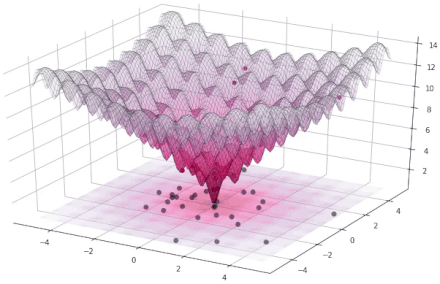

Global minimum is indeed in [0,0].

My own implementation:

# Algorithm:

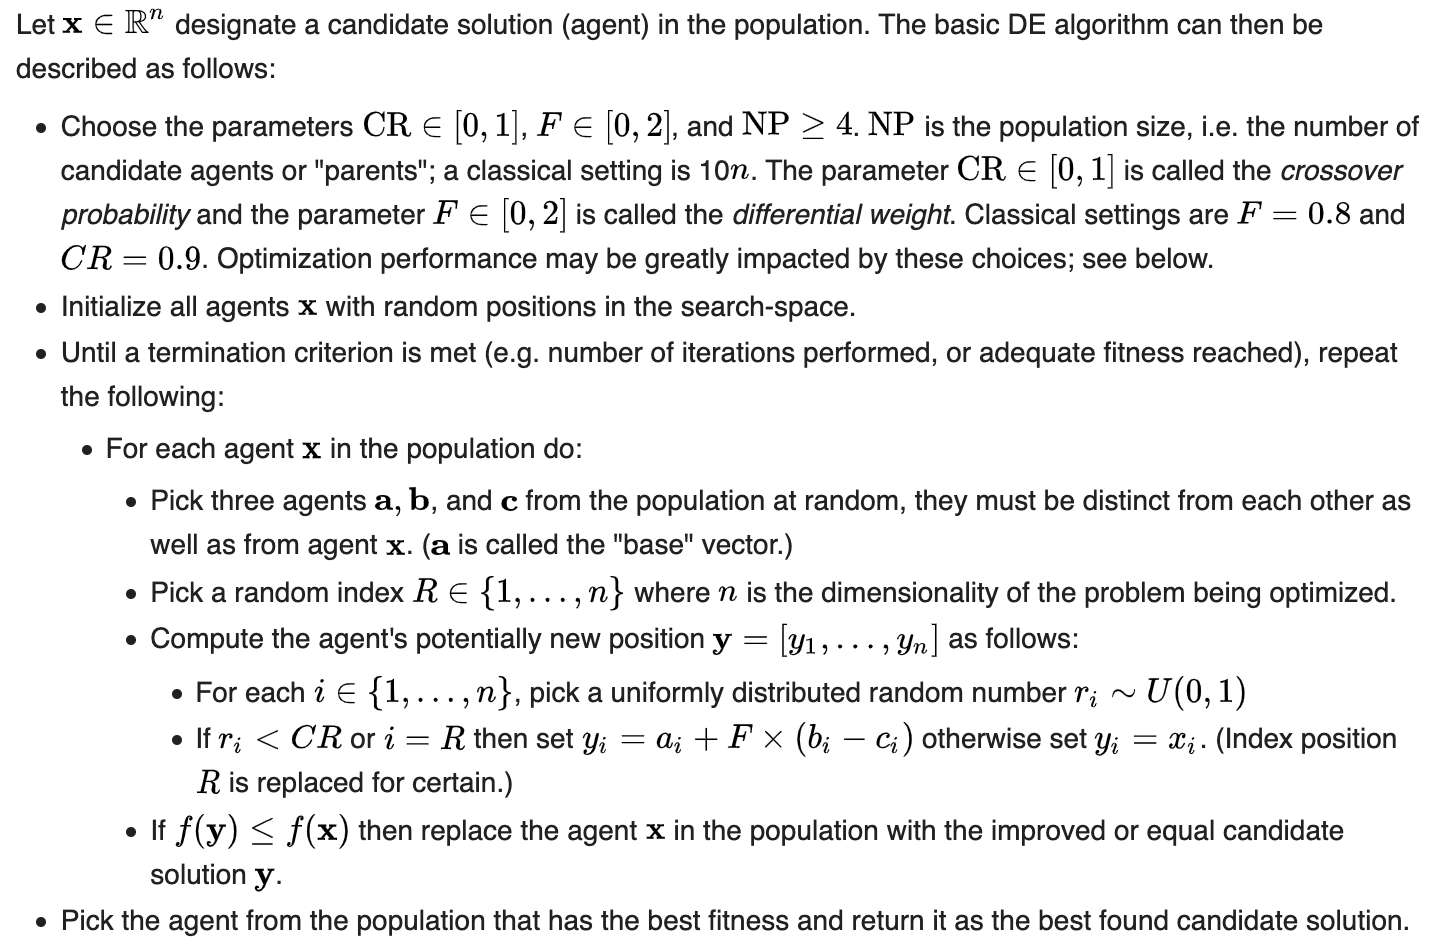

In [113]:
from dataclasses import dataclass

@dataclass
class Result:
    x: any
    fun: any
        
def index_of_best_agent(population, fun):
    # apply fitness function on each agent
    applied = map(lambda i: fun(i), population)
    
    # find index of agent with minimal value
    return np.argmin(applied)
   

def pick_agents(population, fun, strategy="best"):
    agents_indices = np.random.choice(range(len(population)), size=3, 
                                   replace=False) # without replacement
 
    if strategy == "best":
        a_i = index_of_best_agent(population, fun)
    else:
        a_i = agents_indices[0]
        
    # remove already used index
    agents_indices = agents_indices[agents_indices != a_i]

    a = population[a_i]
    b = population[agents_indices[0]]
    c = population[agents_indices[1]]
    return a, b, c
    
def my_differential_evolution(fun, bounds):
    """
    fun - function to MINIMIZE
    bounds - [min, max) pairs for each element in x
           - len(bounds) determines dimension of x
    """
    
    N_GEN = 50
    CR = 0.9 # mutation probability
    F = 0.8
    POP_SIZE = 200 # at least 4

    dim = len(bounds) # n, number of parameters in x
    population = [[np.random.uniform(bounds[i][0], bounds[i][1]) for i in range(dim)] for _ in range(POP_SIZE)]
    
    for gen in range(N_GEN):
        for i in range(len(population)):
            x = population[i]
            
            # do not pick current agent as one of agents
            a, b, c = pick_agents(population[:i]+population[i+1:], fun, "best")
            
            # pick index of feature that is always mutated
            r = np.random.randint(0,dim)
            y = np.zeros(dim)
            
            for j in range(dim):
                # pick uniformly distriobuted random number (0,1)
                r_j = np.random.uniform()
                if r_j < CR or j == r:
                    y[j] = a[j] + F * (b[j] - c[j])
                else:
                    y[j] = x[j]
            
            if fun(y) <= fun(x):
                population[i] = y
    
    best = population[index_of_best_agent(population, fun)]
    return Result(best, fun(best))
    

In [117]:
result = my_differential_evolution(ackley, bounds)
result.x, result.fun

(array([-0.00021942,  0.00010664]), 0.0006916104987948479)

Let's try it on different function:

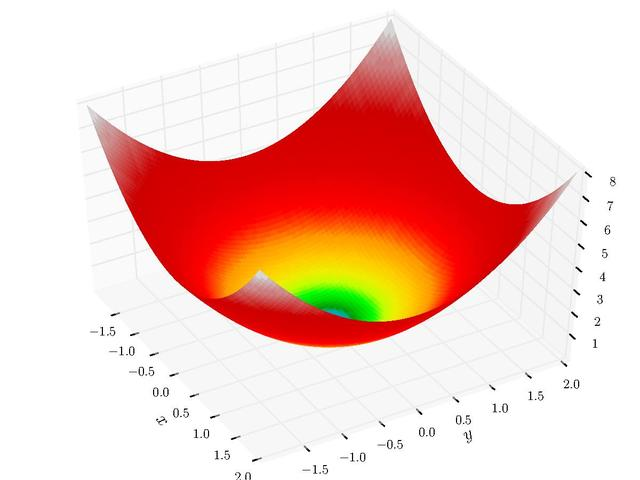

In [129]:
from scipy.linalg import norm

def paraboloid(x):
    # L2 norm squared, therefore sum of squares
    return norm(x, 2)**2

assert paraboloid([2, 1, 3]) == 14

In [130]:
result = my_differential_evolution(paraboloid, bounds)
result.x, result.fun

(array([-1.42720568e-04, -8.67649727e-06]), 2.0444442004431636e-08)